In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os, glob, inspect, sys

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib' from '/home/marie-anne/code/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

# Import data

In [2]:
data_path = "../../Data/Merged_data"
df = pd.read_csv(os.path.join(data_path, 'ALL_TUBE_PIPE_merge_1.csv'), 
                 index_col=0)
df.head()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,std_MBN,median_CF_g,mean_CF_g,std_CF_g,median_perm_g,mean_perm_g,std_perm_g,median_pMBN_g,mean_pMBN_g,std_pMBN_g
T_B1,12.947951,0.073112,0.000234,0.000018,0.0175,0.0042,0.001264,0.000519,4.410000e-13,4.090000e-07,...,0.127282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B2,12.920068,0.077814,0.000571,0.000139,0.0240,0.0057,0.002486,0.000816,1.520000e-06,1.510000e-06,...,0.110443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B3,12.932865,0.088762,0.000244,0.000030,0.0134,0.0028,0.001168,0.000555,4.270000e-13,5.640000e-07,...,0.178157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B4,10.763517,0.071173,0.000379,0.000100,0.0146,0.0031,0.002084,0.000648,7.580000e-07,1.000000e-06,...,0.052547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B5,12.942958,0.074808,0.000230,0.000033,0.0182,0.0040,0.001141,0.000447,3.970000e-13,4.670000e-07,...,0.042655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculating new values

In [3]:
calc_df = mc.updated_df(df, mc.measures_list, mc.errors_list)

In [4]:
calc_df.describe()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,mean_MBN_UB,mean_CF_g_UB,mean_perm_g_UB,mean_pMBN_g_UB,AUC_avg,AUC_LB,AUC_UB,AUC_std,CF_perm,CF_perm_std
count,24.000000,24.000000,16.000000,16.000000,24.000000,16.000000,24.000000,24.000000,2.400000e+01,2.400000e+01,...,24.000000,8.000000,8.000000,8.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.444946,0.094940,0.000356,0.000058,0.022125,0.004994,0.001851,0.000611,2.139557e-07,5.654833e-07,...,0.624929,1.045359,122.415019,0.733929,6.065558,3.991885,8.139230,2.073672,0.036075,0.040161
std,0.882849,0.024646,0.000108,0.000037,0.005491,0.001762,0.000614,0.000220,5.191123e-07,4.960846e-07,...,0.261966,0.356661,20.551191,0.320290,3.740373,2.223343,5.445129,1.818227,0.047215,0.035018
min,10.763517,0.071173,0.000230,0.000018,0.013400,0.002800,0.000933,0.000210,2.010000e-13,9.860000e-08,...,0.307519,0.560895,83.640677,0.118188,2.064942,1.618793,2.425848,0.360906,0.004743,0.006812
25%,12.114038,0.077206,0.000273,0.000028,0.018125,0.003700,0.001373,0.000445,4.260000e-13,1.262500e-07,...,0.420057,0.901279,117.562287,0.614704,2.216984,1.789498,2.759326,0.461821,0.008661,0.011857
50%,12.926379,0.090211,0.000340,0.000049,0.022600,0.004650,0.001747,0.000598,1.152100e-10,4.440000e-07,...,0.594378,0.943838,124.250330,0.834045,5.734400,3.772048,7.549144,1.628287,0.016635,0.018800
75%,12.985953,0.102029,0.000415,0.000078,0.025700,0.005825,0.002148,0.000788,9.282500e-08,6.730000e-07,...,0.727303,1.161633,129.929706,0.918169,7.319179,4.822983,9.452404,2.470115,0.027512,0.074110
max,13.169977,0.182199,0.000571,0.000139,0.035900,0.008700,0.003377,0.001147,2.070000e-06,1.730000e-06,...,1.214995,1.733224,153.463592,1.087872,15.173947,10.594118,19.753776,6.339571,0.140894,0.111871


## Scaling values

In [5]:
scaled_df = mc.scale_general(calc_df, MinMaxScaler())[0]
scaled_df.head()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,mean_MBN_UB,mean_CF_g_UB,mean_perm_g_UB,mean_pMBN_g_UB,AUC_avg,AUC_LB,AUC_UB,AUC_std,CF_perm,CF_perm_std
T_B1,0.907738,0.017461,0.010566,0.000000,0.182222,0.237288,0.135434,0.330382,1.159420e-07,0.190266,...,0.334634,NaN,NaN,NaN,0.301883,0.323365,0.294191,0.190733,0.083521,0.049673
T_B2,0.896151,0.059814,1.000000,1.000000,0.471111,0.491525,0.635434,0.646362,7.342995e-01,0.865146,...,0.446710,NaN,NaN,NaN,0.770838,0.559721,0.881317,0.864154,0.087820,0.103250
T_B3,0.901469,0.158423,0.039918,0.098855,0.000000,0.000000,0.096154,0.368786,1.091788e-07,0.285276,...,0.510208,NaN,NaN,NaN,0.281228,0.230134,0.311228,0.285403,0.081138,0.138989
T_B4,0.000000,0.000000,0.436748,0.678038,0.053333,0.050847,0.470949,0.467570,3.661835e-01,0.552532,...,0.284536,NaN,NaN,NaN,0.532883,0.418142,0.594614,0.554949,0.971500,0.654792
T_B5,0.905663,0.032736,0.000000,0.128237,0.213333,0.203390,0.085106,0.253680,9.468600e-08,0.225818,...,0.297579,NaN,NaN,NaN,0.333517,0.345820,0.330423,0.226383,0.126549,0.077798


## Selecting sub samples

In [6]:
tube, pipe, tube_wo_blind, tube_blind = mc.get_subsample_df(calc_df)

In [7]:
tube_scaled, pipe_scaled, tube_wo_blind_scaled, tube_blind_scaled = mc.get_subsample_df(scaled_df)

In [8]:
corr_scaled_df = scaled_df.copy().loc[:,mc.correlation_list]
tube_scaled_corr, pipe_scaled_corr, \
tube_wo_blind_scaled_corr, tube_blind_scaled_corr = mc.get_subsample_df(corr_scaled_df)

# Clustering

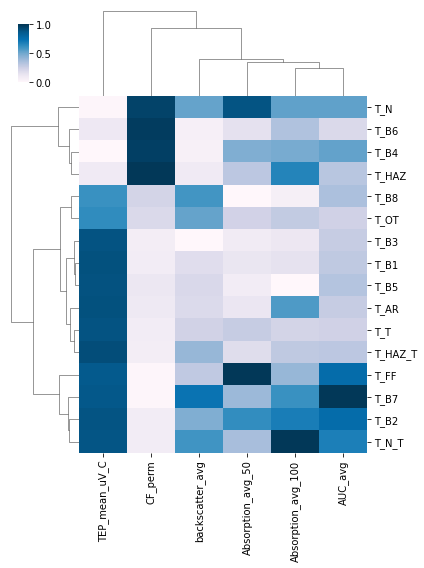

In [11]:
sns.clustermap(tube_scaled_corr, method='ward', metric='euclidean', cmap='PuBu', figsize=(6,8), dendrogram_ratio=(0.2, 0.2), cbar_pos=(0.05, 0.85, 0.025, 0.1))

In [ ]:
color = 4*['gray',  
           'lightseagreen',  'steelblue', 'lightseagreen', 'lightcoral', 'mediumslateblue',
           'lightseagreen',  'navy',  'lightcoral',  'navy',
            'mediumslateblue',  'mediumslateblue', 'navy', 'lightcoral', 'purple']
plot_dendro(tube_scaled_corr, color, )

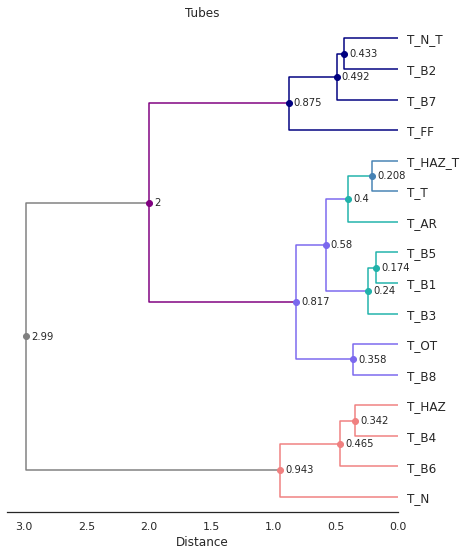

In [31]:
sns.set_theme(style="white")

Z = hierarchy.linkage(tube_scaled_corr,
method='ward',
metric='euclidean')

ax, fig = plt.subplots(figsize=(7,9))
color = 4*['gray',  
           'lightseagreen',  'steelblue', 'lightseagreen', 'lightcoral', 'mediumslateblue',
           'lightseagreen',  'navy',  'lightcoral',  'navy',
            'mediumslateblue',  'mediumslateblue', 'navy', 'lightcoral', 'purple']

dendro = hierarchy.dendrogram(Z, labels=tube_scaled_corr.index, leaf_rotation=0, orientation='left',
                         link_color_func=lambda k: color[k])

for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    y = 0.5 * sum(i[1:3])
    x = d[1]
    plt.plot(x, y, 'o', c=c)
    plt.annotate('%.3g'%x, (x, y), xytext=(5, -5),
                 textcoords = 'offset points',
                 va='bottom', ha='left',
                 fontsize=10
                )


plt.xlabel('Distance')
plt.title('Tubes')
sns.despine(left=True)

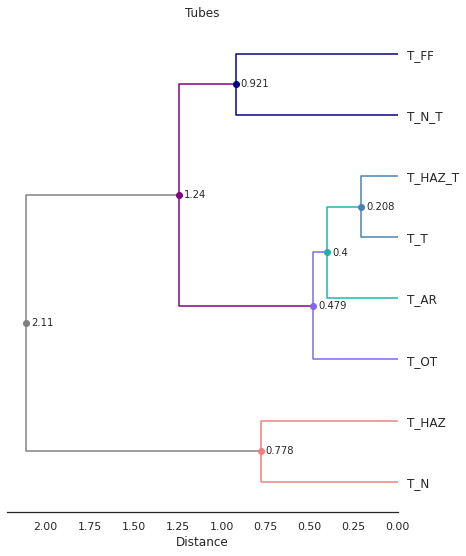

In [33]:
sns.set_theme(style="white")

Z_wo = hierarchy.linkage(tube_wo_blind_scaled_corr,
method='ward',
metric='euclidean')

ax, fig = plt.subplots(figsize=(7,9))
color = 2*['steelblue', 'lightseagreen', 'mediumslateblue', 'lightcoral', 'navy', 'purple', 'gray', 'gray']
dendro = hierarchy.dendrogram(Z_wo, labels=tube_wo_blind_scaled_corr.index, leaf_rotation=0, orientation='left',
                         link_color_func=lambda k: color[k])

for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    y = 0.5 * sum(i[1:3])
    x = d[1]
    plt.plot(x, y, 'o', c=c)
    plt.annotate('%.3g'%x, (x, y), xytext=(5, -5),
                 textcoords = 'offset points',
                 va='bottom', ha='left',
                 fontsize=10
                )

plt.xlabel('Distance')
plt.title('Tubes')
sns.despine(left=True)

# Cophenetic Correlation Coefficient 
Calculate the cophenetic distances between each observation in the hierarchical clustering defined by the linkage Z.

Suppose that the original data {Xi} have been modeled using a cluster method to produce a dendrogram {Ti}; that is, a simplified model in which data that are "close" have been grouped into a hierarchical tree. Define the following distance measures.
- x(i, j) = | Xi − Xj |, the ordinary Euclidean distance between the ith and jth observations.
- t(i, j) = the dendrogrammatic distance between the model points Ti and Tj. This distance is the height of the node at which these two points are first joined together.

Then, letting x ¯ {\displaystyle {\bar {x}}} {\bar {x}} be the average of the x(i, j), and letting t ¯ {\displaystyle {\bar {t}}} {\bar {t}} be the average of the t(i, j), the cophenetic correlation coefficient c is given by



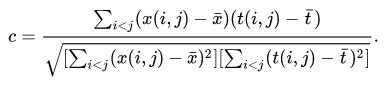

In [36]:
# The closer the value is to 1, the better the clustering preserves the original distances.
c, coph_dists = hierarchy.cophenet(Z, pdist(tube_scaled_corr))
print(c)

0.9435106508372496


In [37]:
c, coph_dists = hierarchy.cophenet(Z_wo, pdist(tube_wo_blind_scaled_corr))
print(c)

0.9587136202455667


In [40]:
#HOW???
depth = 5
incons = hierarchy.inconsistent(Z, depth)
incons
# avg, std, count, inconsistency 

array([[ 0.17388013,  0.        ,  1.        ,  0.        ],
       [ 0.20783508,  0.        ,  1.        ,  0.        ],
       [ 0.2069686 ,  0.04679416,  2.        ,  0.70710678],
       [ 0.34177867,  0.        ,  1.        ,  0.        ],
       [ 0.35761683,  0.        ,  1.        ,  0.        ],
       [ 0.3038728 ,  0.13581785,  2.        ,  0.70710678],
       [ 0.43265855,  0.        ,  1.        ,  0.        ],
       [ 0.40320427,  0.08686891,  2.        ,  0.70710678],
       [ 0.46246041,  0.04214619,  2.        ,  0.70710678],
       [ 0.32025806,  0.16889662,  5.        ,  1.53555141],
       [ 0.39657031,  0.23150669,  7.        ,  1.81642581],
       [ 0.60011264,  0.24027602,  3.        ,  1.14578423],
       [ 0.58297112,  0.31736645,  3.        ,  1.13286612],
       [ 0.59741441,  0.51704076, 11.        ,  2.70348897],
       [ 0.8404765 ,  0.7899583 , 13.        ,  2.717816  ]])

In [43]:
hierarchy.maxinconsts(Z, incons)

array([0.        , 0.        , 0.70710678, 0.        , 0.        ,
       0.70710678, 0.        , 0.70710678, 0.70710678, 1.53555141,
       1.81642581, 1.14578423, 1.13286612, 2.70348897, 2.717816  ])

In [53]:
hierarchy.maxRstat(Z, incons, 0)

array([0.17388013, 0.20783508, 0.2069686 , 0.34177867, 0.35761683,
       0.3038728 , 0.43265855, 0.40320427, 0.46246041, 0.32025806,
       0.39657031, 0.60011264, 0.58297112, 0.60011264, 0.8404765 ])

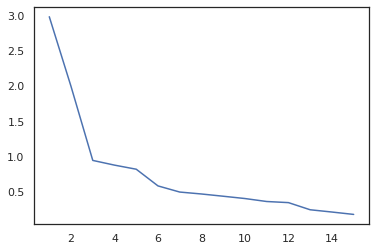

In [48]:
# plot_elbow
last = Z[:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

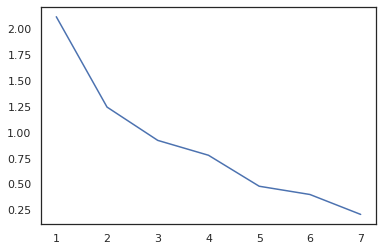

In [56]:
# plot_elbow
last = Z_wo[:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

# fcluster
Cluster observation data using a given metric.

Clusters the original observations in the n-by-m data matrix X (n observations in m dimensions), using the euclidean distance metric to calculate distances between original observations, performs hierarchical clustering using the single linkage algorithm, and forms flat clusters using the inconsistency method with t as the cut-off threshold.

In [57]:
hierarchy.fclusterdata(tube_scaled_corr, t=3, criterion='maxclust', method='ward')

array([2, 3, 2, 1, 2, 1, 3, 2, 2, 1, 3, 2, 2, 3, 1, 2], dtype=int32)

In [38]:
from sklearn import metrics
metrics.silhouette_score(tube_blind_scaled_corr)

TypeError: silhouette_score() missing 1 required positional argument: 'labels'

In [ ]:
import plotly.figure_factory as ff
import plotly.io as pio
dendro = ff.create_dendrogram(pipe_scaled, distfun='ward')
dendro.update_layout(width=800, height=500)
dendro.show()
pio.write_json(dendro, 'test.plotly')